## Kaggle Sales Analysis

In [1]:
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import math
import glob
import os

#### Merging all data into a single file (Data was initially 12 months)

In [2]:
file_path = "./Sales_Data"
sales_files = [file for file in os.listdir(file_path) if not file.startswith('.')]

all_months_data = pd.DataFrame()
for file in sales_files:
    current_sales_data = pd.read_csv(file_path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_sales_data])

all_months_data.to_csv("./Sales_Data/all_months_data.csv", index=False)

#### Showing that all of the months data was combined in one place

In [3]:
sales_df = pd.read_csv("./Sales_Data/all_months_data.csv")
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data errors!

The data is not proper and has a lot of errors and will be fixed as follows.

#### Data is unorganized and filled with NaN values so values will be dropped

In [4]:
nan_df = sales_df[sales_df.isna().any(axis=1)]
display(nan_df.head())

# Drops all NaN values
sales_df = sales_df.dropna()
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Data rows were being duplicated so all of it will be dropped also drop irrlavent collumns

In [5]:
duplicated_df = sales_df[sales_df['Order Date'].str[0:2] == 'Or']
display(duplicated_df.head())

# the opposite of duplicated_df, as you can see row 519 was dropped
sales_df = sales_df[sales_df['Order Date'].str[0:2] != 'Or']

# Dropping irrleavant colluns
# sales_df.drop(columns='Unnamed: 0.1', axis = 1)

sales_df.head(519)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
516,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016"
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"


#### Some collumns that need to be integers (i.e "Price Each") were strings and they need to be converted accordingly

In [6]:
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered']) 
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each']) 
#sales_df['Month'] = pd.to_numeric(sales_df['Month']) 

### Oraganizing data!

We will be adding new collumns such as sales and making the months easier to read, comments below explain as follows.

#### Finding the best month for sales using visualization

,Quantity Ordered,Price Each,Sales
Month,,,
1,76321,12682378.66,12755797.11
2,94143,15322193.04,15414156.94
3,119035,19538454.81,19649702.66
4,143906,23573697.14,23734691.68
5,130669,21945875.91,22068247.25
6,106771,17934179.27,18044615.82
7,112504,18427776.92,18534430.32
8,94136,15612417.94,15711275.16
9,91763,14594944.63,14682920.91


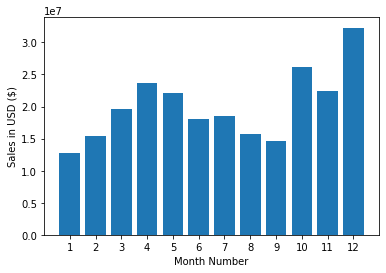

In [11]:
# Replaces the number version of a month with the name
sales_df['Month'] = sales_df['Order Date'].str[0:2] 
sales_df['Month'] = sales_df['Month'].astype('int32')

# Converting month number to name
#sales_df['Month'].index = sales_df['Month']
#sales_df['Month'] = pd.to_datetime(sales_df['Month'])

# Adding a new sales collumn
sales_df['Sales'] = sales_df["Quantity Ordered"] * sales_df["Price Each"]

# TODO: Creating a new data frame that sorts the sales per month form highest to lowest and exporting it
sales_per_month_df = pd.DataFrame()
sales_per_month_df = pd.concat([sales_per_month_df, sales_df])

# Seperating new month from the rest of collumns so it can be seen easier
sales_per_month_df = round(sales_df.groupby('Month').sum(), 4)
sales_per_month_df.sort_values(by=['Sales'], ascending = False)
display(sales_df.groupby('Month').sum())


# Plotting our data
# sns.relplot(data=sales_df,x=sales_df['Sales']) # TODO use seaborn
months = range(1, 13)
plt.bar(months, sales_per_month_df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

sales_per_month_df.to_csv("./Sales_Summary_Organized/sales_per_month.csv", index=False)

#### Finding the City with the highest number of sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),116214,19459357.40,733558,19568490.06
Austin (TX),78071,12669115.27,488803,12737072.25
Boston (MA),157696,25461868.39,987784,25631494.07
Dallas (TX),117110,19268394.74,732340,19375827.80
Los Angeles (CA),233023,37950046.61,1458275,38167995.60
New York City (NY),195524,32447595.81,1230187,32650222.01
Portland (ME),19250,3130324.75,120008,3148307.89
Portland (OR),79121,13023907.54,494347,13095126.38
San Francisco (CA),351673,57480232.18,2208640,57835427.37


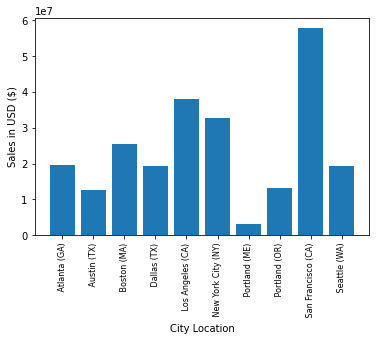

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] # want the whitespace after city name

# Apply a arbritary function and augment our data to get the city between two commas 
sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

city_sales_df = sales_df.groupby('City').sum()
round(city_sales_df.groupby('City').sum(), 4)
display(city_sales_df)

# Plotting our data the unque values in the city, this organizes the city more
keys = [city for city, df in city_sales_df.groupby(['City'])]

plt.bar(keys,sales_df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Location')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

city_sales_df.to_csv("./Sales_Summary_Organized/most_profitable_city.csv", index=False)

#### Finding out which time advertistments should be displayed so customer buys product


Aggregating our data as a distribution over time.

In [ ]:
# Using the date time library to parse the time: hour, munite
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Hour'] = sales_df['Order Date'].dt.hour
sales_df['Minute'] = sales_df['Order Date'].dt.minute
sales_df['Count'] = 1

# Prints out 1 through 24 (the hours in a day)
# Count the number of rows by each hour
hours = [hour for hour, df in sales_df.groupby(['Hour'])]

# Plot line graph
plt.plot(hours, sales_df.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

print("There are peaks of around 11 am and 7 pm, so these are the peak times people make orders, therefore we should avertise around this time")


#### Counting the pairs of each product

This will determine which 2 products are most commonly ordered togther, this is useful for promotions, make a combo deal to sell both products at once.

In [ ]:
# Create a new data frame the return duplicate order ID's which means they were bought together
df = sales_df[sales_df['Order ID'].duplicated(keep=False)]

# All of the orders with the same ID goes on the same line, transform modifies cell contents
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)
        
df2.to_csv("./Sales_Summary_Organized/products_bought_togther.csv", index=False)

#### Understanding what product sold the most and why

To do this we can sum up the uanity ordered collum and agregating it with a groupby. This shows that the AAA batteries and lighting cable are sold the most

In [ ]:
# Getting the price of each product
prices = sales_df.groupby('Product').mean('Price Each')
prices

In [ ]:
# Summing up all of the product sold, it will display the most selling product
product_group = sales_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

# Plotting our sales per product
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

Blue = price, green = quanity ordered, so whenever the quanity ordered is high, the pirce should be low, since a washing machine isnt sold as much it is very small 

In [ ]:
# Overlaying our line graph with our plot to ensure that its accurate
prices = sales_df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()